## Prediction using Supervised Machine Learning
## Author: Prashant Sharma

### Objective: To build a machine learning model such that for a value of hours a student spends studying, a prediction has to be made about how much the student scores.

In [1]:
'''Importing Libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
'''Importing the file'''
url=('http://bit.ly/w-data')
df=pd.read_csv(url)

## Exploratory Data Analysis
Main focus would be on trying to find details that will help solve our objective

In [40]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Shape of Dataset=(25, 2) 
Number of missing values=Hours     0
Scores    0
dtype: int64


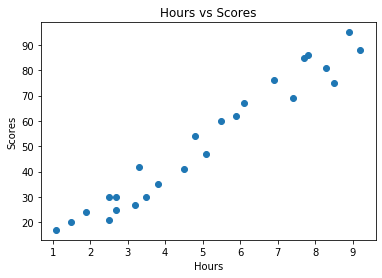

In [35]:
print('Shape of Dataset={} \nNumber of missing values={}'.format(df.shape,df.isnull().sum()))
plt.scatter(x=df.iloc[:,0], y=df.iloc[:,1])#Scatter Plot
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

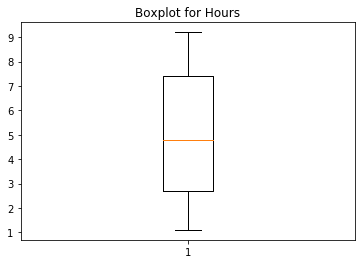

In [38]:
plt.boxplot(df.Hours)
plt.title('Boxplot for Hours')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

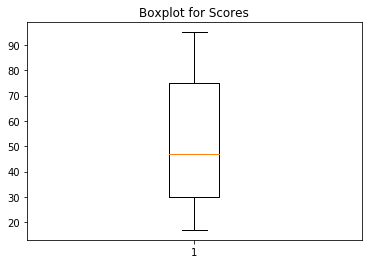

In [37]:
plt.boxplot(df.Scores)
plt.title('Boxplot for Scores')
plt.show

In [14]:
df.corr() #Correlation coefficient between feature hours and depedendent variable Scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Conclusion of Exploratory Data Analysis
1. Data has 1 feature and 1 target variable, with number of rows being 25.
2. No null values detected.
3. Looking at the scatterplot, we can see that there is a high correlation between the independent and dependent variable. This fact is established by finding the correlation coefficient.
4. There exist no outliers in the data.

## Using Simple Linear Regression to solve the objective
Building the model

In [24]:
x=np.array(df.iloc[:,0])
y=np.array(df.iloc[:,1])

In [25]:
'''Splitting the data into training and test data'''
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test=tts(np.array(x.reshape(-1,1)), y.reshape(-1,1), test_size=0.2, random_state=123)
model=LinearRegression()

In [28]:
'''Fitting the Linear Regressor model on training data and predicting values for test data'''
model.fit(x_train, y_train) #Training the model using training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=model.predict(x_test) #Predictions for dependent variable based on values of feature

In [9]:
df = pd.DataFrame(data=y_test)
df['Predicted']=pd.DataFrame(data=y_pred)
df.columns=['Actual','Predicted']
df

,Actual,Predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


## Evaluating the model
Predicted values of the dependent variable come close to the Actual values. Further calculating the R squared score to find the efficacy of our model in numbers.

In [10]:
'''R_Square Score: Gives an indication of how well the model would perform on unknown data'''
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

R2 score = 0.96


## Making Predictions
Model works great and would perform well on unseen data. Using the trained model to find value based on previously unseen value for Hours-9.25

In [11]:
'''Finding the predicted value for an unknown independent value'''
u=np.array(9.25)
print(model.predict(u.reshape(-1,1)))

[[91.51128762]]
